# FIVE YEARS OF IMPORTS 2020-2024

### Let's get necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

For this project we'll be using data provided by the National Institute of Statistics in Bolivia (INE) regarding data from the past 5 years (periods 2020 - 2024). Its possible to download this data from their official website at http://web2.ine.gob.bo:8081/IneComex/BasesComex.aspx as .txt individual files for each year.

In [2]:
# First we'll check if there are inconsistencies with the format of the columns, 
# that way we can proceed to concatenate this five files into just one. 

# In both cases the sep = '|' and due to a 'str' problem we have to specify encoding='latin1'


df1 = pd.read_csv ('importaciones.txt', sep = '|', encoding='latin1')     # for the 2024 file 
df2= pd.read_csv ('imp2020.txt', sep = '|', encoding='latin1')            #for the 2020 file 

C:\Users\sebas\AppData\Local\Temp\ipykernel_4992\4217235276.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv ('importaciones.txt', sep = '|', encoding='latin1')     # for the 2024 file


In [3]:
pd.set_option('display.max_columns', None)
df1.head()

In [4]:
df2.head()

,GESTION,MES,des_aduana,Departamento,des_via,des_medio,des_pais,NANDINA,des_nandina,GCER3,CUODE,Peso_Bruto_kg,Valor_CIF_Sus,Valor_FOB_Sus,Valor_CIF_Bs,Gravamen_Aduanero_Bs,CIIUR3,CUCIR3
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2,308,297,2145,107,2926,7243
1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199,5963,5803,41503,4151,2919,7439
2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716,4526,4260,31500,0,2520,8484
3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501,346,300,2408,120,2922,7373
4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166,1961,1675,13647,1366,2424,5532


In [5]:
a = df1.columns.values.tolist()
b = df2.columns.values.tolist()

print (a)
print (b)

['gestion', 'mes', 'aduana', 'desadu', 'depto', 'via', 'desvia', 'medio', 'desmed', 'pais', 'deszon', 'otros', 'otros_tcp', 'despai', 'nandina', 'desnan', 'gcer3', 'cuode', 'kilos', 'kilnet', 'fro', 'fob', 'pto', 'adu', 'pag', 'lib', 'ciiur3', 'cuci', 'cucir3', 'cod_cuo']
['GESTION', 'MES', 'des_aduana', 'Departamento', 'des_via', 'des_medio', 'des_pais', 'NANDINA', 'des_nandina', 'GCER3', 'CUODE', 'Peso_Bruto_kg', 'Valor_CIF_Sus', 'Valor_FOB_Sus', 'Valor_CIF_Bs', 'Gravamen_Aduanero_Bs', 'CIIUR3', 'CUCIR3']


As we can see, there is a difference in the column names between the oldest and the newest files. If we proceed with this and concatenate all the files, it will result in more unnecessary columns, so we need to standardize the column labels.

In [6]:
# first lets make a function to standarize column names
def standarize_columns (df):
    df.columns = df.columns.str.strip().str.lower()      # to get rid of spaces and make it lowercase
    return df

# this will help with labels as 'GESTION' and 'gestion' to be the same 

In [7]:
# for columns that showcase the same thing but have different labels we'll rename them with column_mapping

column_mapping = {
    'des_aduana': 'desadu',
    'departamento': 'depto',
    'des_via': 'desvia',
    'des_medio': 'desmed',
    'des_pais': 'despai',
    'des_nandina': 'desnan',
    'GCER3': 'gcer3',
    'CIIUR3': 'ciiur3',
    'CUCIR3': 'cucir3',
    'peso_bruto_kg': 'kilos',
    'valor_cif_sus': 'fro',
    'valor_fob_sus': 'fob',
    'valor_cif_bs': 'adu'
}

In [8]:
# Now we can proceed to prepare to concatinate all the  files we have saved in a directory

directory = 'c:/Users/sebas/Desktop/practice' 
files = [f for f in os.listdir(directory) if f.endswith ('.txt')]

dfs = []

for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, sep="|", encoding="latin1")
    df = standarize_columns(df)
    df.rename(columns = column_mapping, inplace = True)
    dfs.append(df)


C:\Users\sebas\AppData\Local\Temp\ipykernel_4992\3632851435.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="|", encoding="latin1")


In [9]:
# And now we concat these 5 files 
all_files = pd.concat(dfs, ignore_index = True)

In [10]:
# we'll keep the raw data for now, so we will adress dtypes later on 
all_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027458 entries, 0 to 2027457
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   gestion               float64
 1   mes                   int64  
 2   desadu                object 
 3   depto                 int64  
 4   desvia                object 
 5   desmed                object 
 6   despai                object 
 7   nandina               object 
 8   desnan                object 
 9   gcer3                 object 
 10  cuode                 object 
 11  kilos                 float64
 12  fro                   float64
 13  fob                   float64
 14  adu                   float64
 15  gravamen_aduanero_bs  float64
 16  ciiur3                object 
 17  cucir3                object 
 18  aduana                float64
 19  via                   float64
 20  medio                 float64
 21  pais                  float64
 22  deszon                object 
 23  otros  

In [11]:
 all_files.to_csv("c:/Users/sebas/Desktop/practice/merged_raw.csv")

In [4]:
df = pd.read_csv ('merged_raw.csv', index_col=[0])

C:\Users\sebas\AppData\Local\Temp\ipykernel_11876\3692825923.py:1: DtypeWarning: Columns (8,23,24,25,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('merged_raw.csv', index_col=[0])


In [13]:
df.head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,aduana,via,medio,pais,deszon,otros,otros_tcp,kilnet,pto,pag,lib,cuci,cod_cuo
0,2020.0,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501.0,346.0,300.0,2408.0,120.0,2922,7373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Let's drop columns that contain at least half of their values as na.
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027458 entries, 0 to 2027457
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   gestion               float64
 1   mes                   int64  
 2   desadu                object 
 3   depto                 int64  
 4   desvia                object 
 5   desmed                object 
 6   despai                object 
 7   nandina               object 
 8   desnan                object 
 9   gcer3                 object 
 10  cuode                 object 
 11  kilos                 float64
 12  fro                   float64
 13  fob                   float64
 14  adu                   float64
 15  gravamen_aduanero_bs  float64
 16  ciiur3                object 
 17  cucir3                object 
dtypes: float64(6), int64(2), object(10)
memory usage: 293.9+ MB


In [6]:
# we have a 'gestion' and 'mes' columns that are year and month respectively, this ones appear 
# with a float and int dtype, we'll keep them like that but lets vreate a new column for date as 'fecha'

#to convert "gestion", and "month" to a datetime type, first we get rid on NA values
df.dropna(axis = 0, subset = 'gestion', inplace= True)
df["gestion"] = df["gestion"].astype(int)
df["dia"] = 1 #creating a temp day column
# Create 'fecha' by concatenating 'gestion', 'mes', and 'dia'
df["fecha"] = df["gestion"].astype(str) + "-" + df["mes"].astype(str) + "-" + df["dia"].astype(str)
df["fecha"] = pd.to_datetime(df["fecha"])
df = df.drop('dia', axis = 1)

#this might not be the easiest and straight forward way of action, but this is the only one that worked

In [19]:
# i would like to see if its a good idea to keep some of these categories as str or cat.
ndesnan = df.desnan.unique().tolist()
k = len(ndesnan)
print (k)

7482


In [20]:
nnandina = df.nandina.unique().tolist()
l = len(nnandina)
print (l)

13079


In [6]:
# Now we can optimize memory usage by changing the dtype for some of the remaining columns 
df['mes'] = df['mes'].astype('int8')
df['depto'] = df['depto'].astype('category')
df['desvia'] = df['desvia'].astype('category')
df['desmed'] = df['desmed'].astype('category')
df['despai'] = df['despai'].astype('category')
df['ciiur3'] = df['ciiur3'].astype('category')
df['cucir3'] = df['cucir3'].astype('category')
df['nandina'] = df['nandina'].astype('str').str.replace('\.0$', '', regex=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   gestion               int32         
 1   mes                   int8          
 2   desadu                object        
 3   depto                 category      
 4   desvia                category      
 5   desmed                category      
 6   despai                category      
 7   nandina               object        
 8   desnan                object        
 9   gcer3                 object        
 10  cuode                 object        
 11  kilos                 float64       
 12  fro                   float64       
 13  fob                   float64       
 14  adu                   float64       
 15  gravamen_aduanero_bs  float64       
 16  ciiur3                category      
 17  cucir3                category      
 18  fecha                 datetime64[ns]
dtypes: ca

In [7]:
df.to_csv('c:/Users/sebas/Desktop/practice/clean_imports.csv')


In [8]:
df = pd.read_csv('clean_imports.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027426 entries, 0 to 2027425
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   gestion               int64  
 2   mes                   int64  
 3   desadu                object 
 4   depto                 int64  
 5   desvia                object 
 6   desmed                object 
 7   despai                object 
 8   nandina               float64
 9   desnan                object 
 10  gcer3                 object 
 11  cuode                 object 
 12  kilos                 float64
 13  fro                   float64
 14  fob                   float64
 15  adu                   float64
 16  gravamen_aduanero_bs  float64
 17  ciiur3                object 
 18  cucir3                object 
 19  fecha                 object 
dtypes: float64(6), int64(4), object(10)
memory usage: 309.4+ MB


# Exploratory Data Analysis
Now we can start with the exploratory analysis, Let's first look at which countries Bolivia imports the most from.

In [21]:
# this will filter and provide a series with the top 10 countries with the highest ammount of unique imports
# for the past 5 years
df.despai.value_counts().head(10)

despai
CHINA             636064
ESTADOS UNIDOS    213319
BRASIL            175742
JAPON              84708
ALEMANIA           84029
MEXICO             56811
ITALIA             55278
ARGENTINA          55116
INDIA              51774
PERU               47089
Name: count, dtype: int64

In [22]:
# Let's save the index so we can see the values of weight and Fob from this countries.
top_10_unique_imports = df.despai.value_counts().head(10).index

# Now we group them by country and get the total fob values

filtered_country = df[df["despai"].isin(top_10_unique_imports)].copy()
filtered_country['despai'] = filtered_country['despai'].astype(str)
income_by_country = filtered_country.groupby('despai')['fob'].sum()

# do the same for weight

weight_by_country = filtered_country.groupby('despai')['kilos'].sum()

# next lets get the fob values in millions and weight in tons.

income_by_country = income_by_country/1000000
weight_by_country = weight_by_country/1000

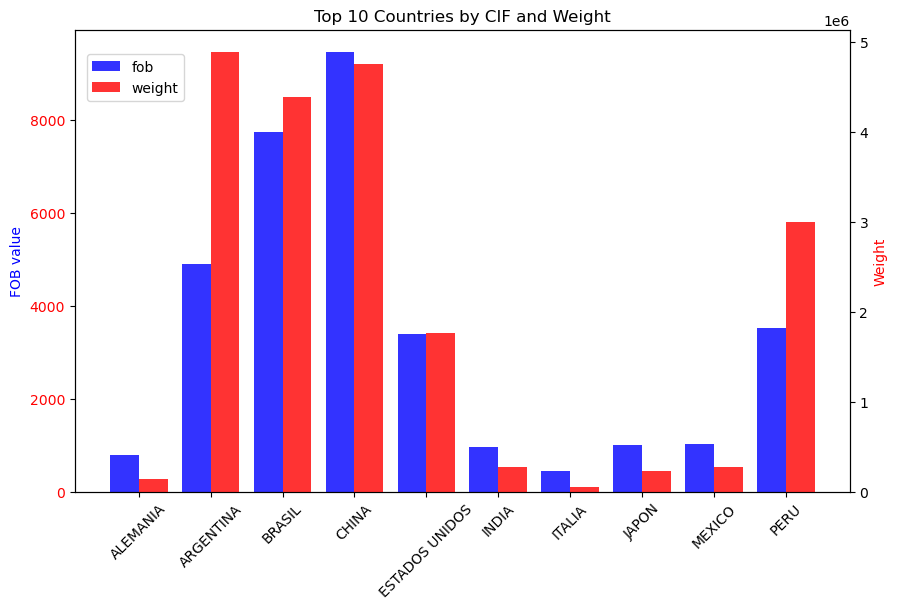

In [23]:
# ploting the results
# let's define the variables
countries = income_by_country.index
fob_values = income_by_country.values
weight_values = weight_by_country.values

# Now we create the figure
fig, ax1 = plt.subplots(figsize =(10, 6))

x = np.arange(len(top_10_unique_imports))

# for the fob values
ax1.bar(x-0.2, fob_values, width=0.4, label= 'fob', color='b', alpha=0.8)
ax1.set_ylabel('FOB value', color ='b')
ax1.tick_params(axis='y', labelcolor='b')

# to showcase both weight and fob on the same graph lets create a twin axes
ax2 = ax1.twinx()
# do the same for weight
ax2.bar(x+0.2, weight_values, width=0.4, label= 'weight', color='r', alpha=0.8)
ax2.set_ylabel('Weight', color ='r')
ax1.tick_params(axis='y', labelcolor='r')

# so the labels on the x axis are readable lets give them an angle
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45)

# Legends
fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.85))

# Naming the plot
plt.title('Top 10 Countries by CIF and Weight')

plt.show()

on the other hand

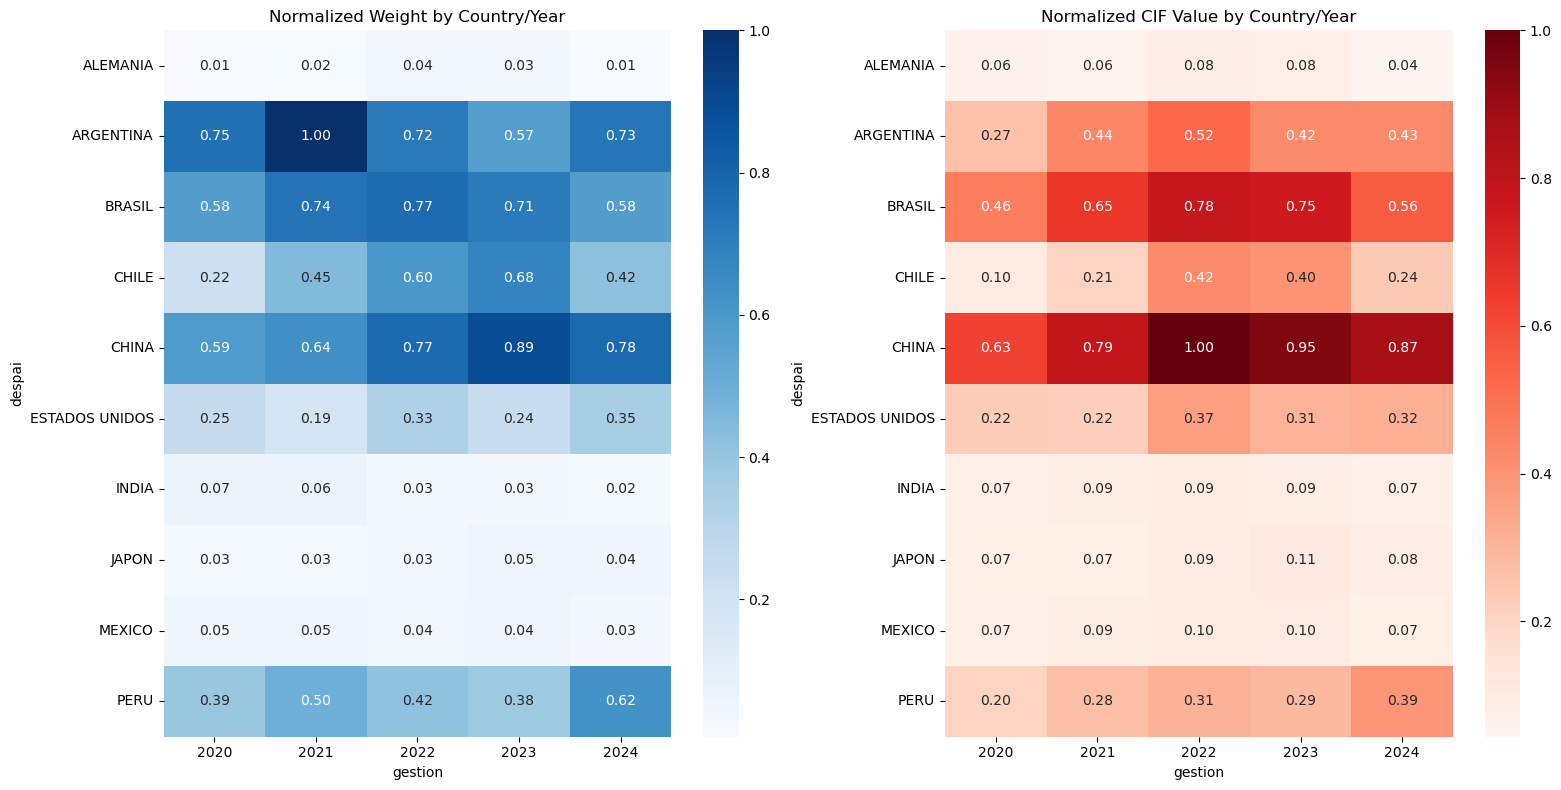

In [24]:
# Pivot table for heatmap (top 10 countries)
heatmap_data = df.groupby(['despai', 'gestion']).agg({'kilos': 'sum', 'fro': 'sum'}).reset_index()
top_countries = heatmap_data.groupby('despai')['fro'].sum().nlargest(10).index
heatmap_data = heatmap_data[heatmap_data['despai'].isin(top_countries)]

# Normalize weight/cif for comparison
heatmap_data['weight_norm'] = heatmap_data['kilos'] / heatmap_data['kilos'].max()
heatmap_data['cif_norm'] = heatmap_data['fro'] / heatmap_data['fro'].max()

# Pivot and plot
pivot_weight = heatmap_data.pivot(index='despai', columns='gestion', values='weight_norm')
pivot_cif = heatmap_data.pivot(index='despai', columns='gestion', values='cif_norm')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(pivot_weight, cmap='Blues', ax=axes[0], annot=True, fmt=".2f")
sns.heatmap(pivot_cif, cmap='Reds', ax=axes[1], annot=True, fmt=".2f")
axes[0].set_title('Normalized Weight by Country/Year')
axes[1].set_title('Normalized CIF Value by Country/Year')
plt.tight_layout()
plt.show()

In [25]:
heatmap_data.head(10)

,despai,gestion,kilos,fro,weight_norm,cif_norm
15,ALEMANIA,2020,1.677384e+07,1.560243e+08,0.012947,0.061294
16,ALEMANIA,2021,2.284272e+07,1.491992e+08,0.017631,0.058612
17,ALEMANIA,2022,5.199990e+07,2.143115e+08,0.040135,0.084191
18,ALEMANIA,2023,4.203437e+07,2.013991e+08,0.032443,0.079119
19,ALEMANIA,2024,8.806281e+06,1.117071e+08,0.006797,0.043884
60,ARGENTINA,2020,9.699689e+08,6.763714e+08,0.748653,0.265710
61,ARGENTINA,2021,1.295618e+09,1.118133e+09,1.000000,0.439255
62,ARGENTINA,2022,9.310137e+08,1.335287e+09,0.718587,0.524562
63,ARGENTINA,2023,7.447335e+08,1.079315e+09,0.574809,0.424005
64,ARGENTINA,2024,9.507603e+08,1.091884e+09,0.733828,0.428943


lets dig into price changes for top categories ('ciiur3') in this past 5 years, in our Dataframe we don't have unit prices, but we can infer this value by dividing the weight values with the CIF values. 
at a first thought we could apply a vectorized operation by creating a new column: 
df["price"] = df["kilos"]/df["fro"] but this would bring a few problems with the outliers.

In [26]:
# Like this we will group up data by month, reducing the impact of the mentioned outlier values
price_trends = df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['fob'].sum() / df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['kilos'].sum()  

# the  previous step will set 'ciiur3' and 'fecha' as the index so lets reset it 
price_trends = price_trends.reset_index(name="unit_price") 

price_trends['price_change'] = price_trends.groupby('ciiur3')['unit_price'].pct_change() * 100

In [27]:
price_trends

,ciiur3,fecha,unit_price,price_change
0,0111,2020-01,0.369139,NaN
1,0111,2020-02,0.518511,40.464914
2,0111,2020-03,0.663586,27.979156
3,0111,2020-04,0.333465,-49.748038
4,0111,2020-05,0.247151,-25.883857
...,...,...,...,...
8695,XXXX,2024-08,6.405761,234.469614
8696,XXXX,2024-09,1.981863,-69.061238
8697,XXXX,2024-10,1.852087,-6.548197
8698,XXXX,2024-11,2.399443,29.553491


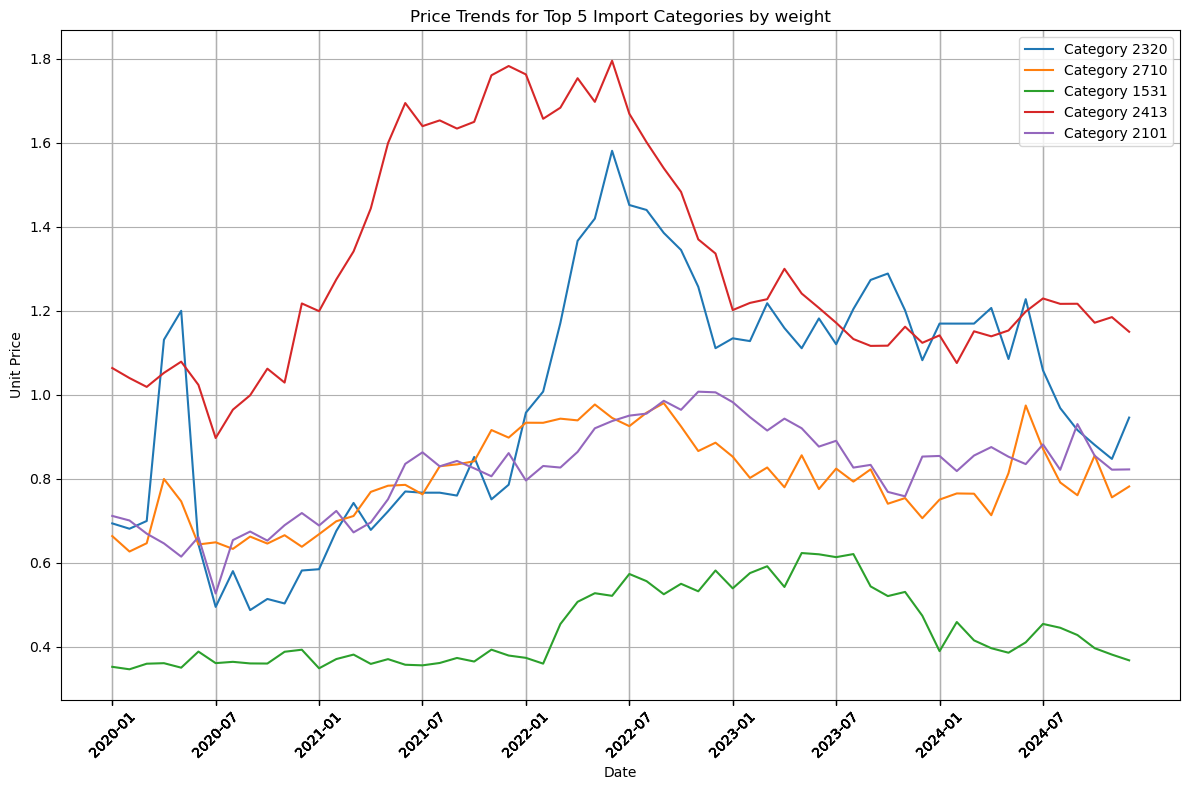

In [28]:
# Select top 5 most imported categories by weight.
top_categories = df.groupby("ciiur3")["kilos"].sum().nlargest(5).index  

# Filter for top categories
filtered_trends = price_trends[price_trends["ciiur3"].isin(top_categories)].copy()

filtered_trends['fecha'] = filtered_trends['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = filtered_trends[filtered_trends['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories by weight')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends['fecha'][::6]) #to get a tick every 6 months
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

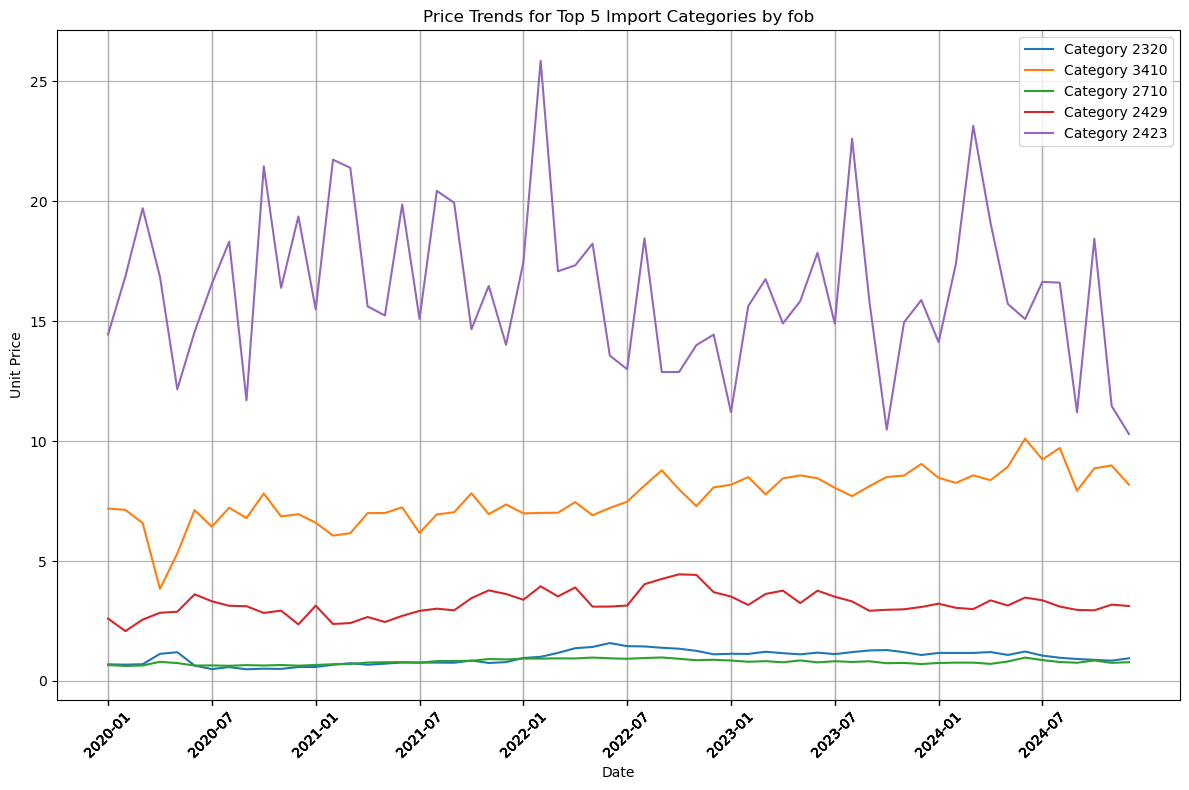

In [29]:
# Let's do the same for the CIF ('fro') values this time 
top_categories_1 = df.groupby("ciiur3")["fob"].sum().nlargest(5).index  

# Filter for top categories
filtered_trends_1 = price_trends[price_trends["ciiur3"].isin(top_categories_1)].copy()

filtered_trends_1['fecha'] = filtered_trends_1['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories_1:
    category_data = filtered_trends_1[filtered_trends_1['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories by fob')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends_1['fecha'][::6])
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

Another thing i would like to explore is 

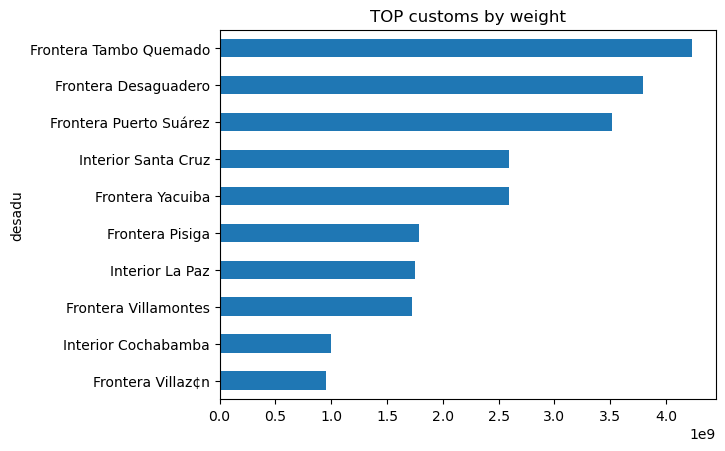

In [30]:
# punto_aduana = df.desadu.unique()
# print (punto_aduana)
df.loc[df['desadu']== 'Frontera Puerto Su\xa0rez', 'desadu'] = 'Frontera Puerto Suárez'

# top customs by weight = 
ax = df.groupby('desadu')['kilos'].sum().nlargest(10).plot(kind='barh', title='TOP customs by weight')
ax.invert_yaxis()
plt.show()

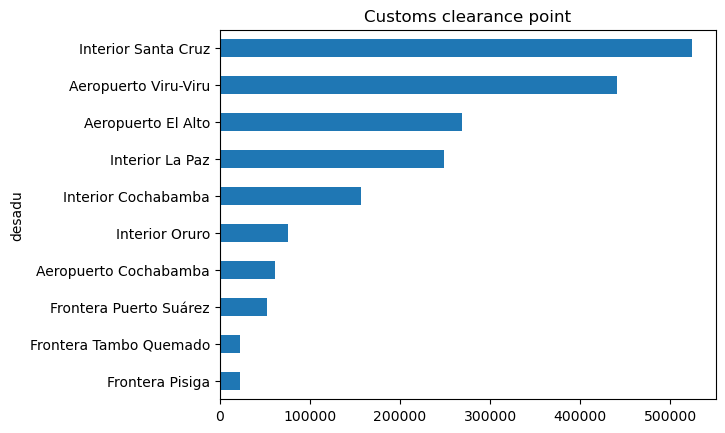

In [31]:
#Top customs by trafic
ax = df.desadu.value_counts().head(10).plot(kind='barh', title='Customs clearance point')
ax.invert_yaxis()
plt.show()

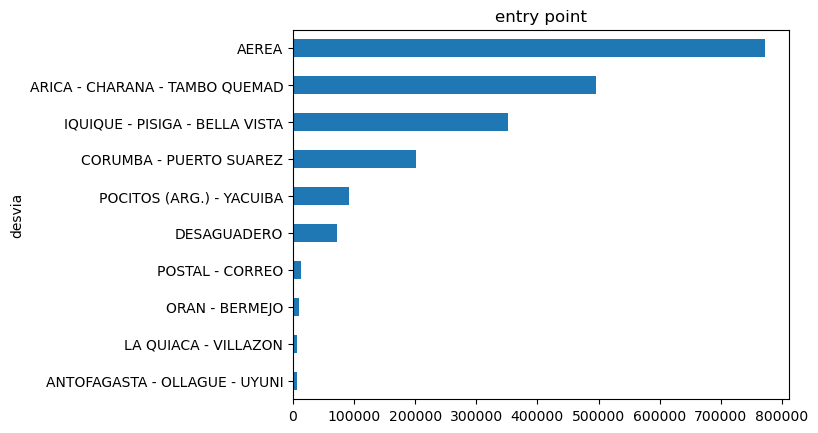

In [32]:
#Top entry points by trafic 
ax = df.desvia.value_counts().head(10).plot(kind='barh', title='entry point')
ax.invert_yaxis()
plt.show()

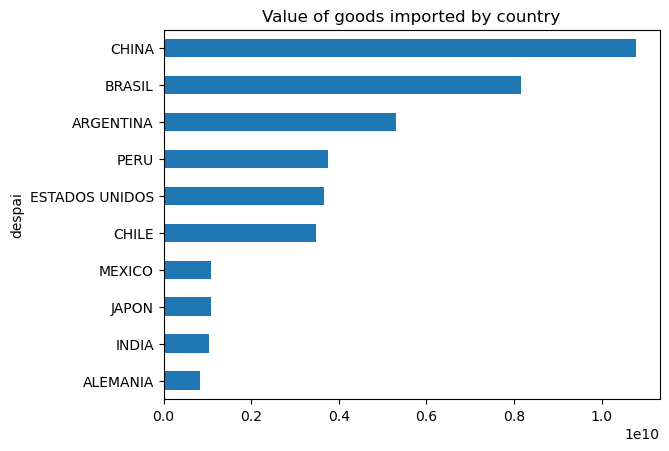

In [33]:
#TOP countries by cif
ax =df.groupby('despai')['fro'].sum().nlargest(10).plot(kind='barh', title='Value of goods imported by country')
ax.invert_yaxis()
plt.show()

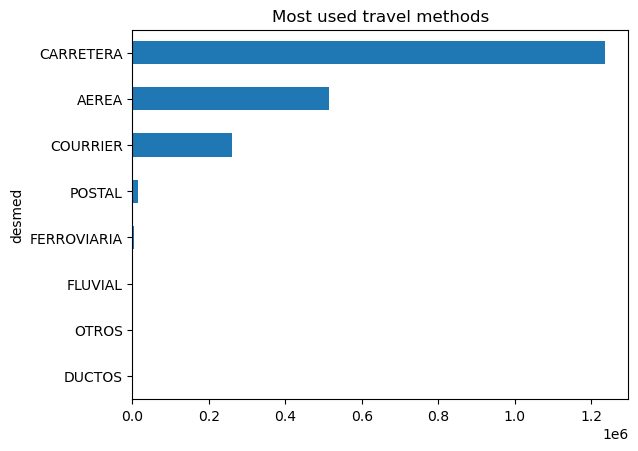

In [34]:
# TOP travel methods
ax = df.desmed.value_counts().plot(kind='barh', title='Most used travel methods')
ax.invert_yaxis()
plt.show()

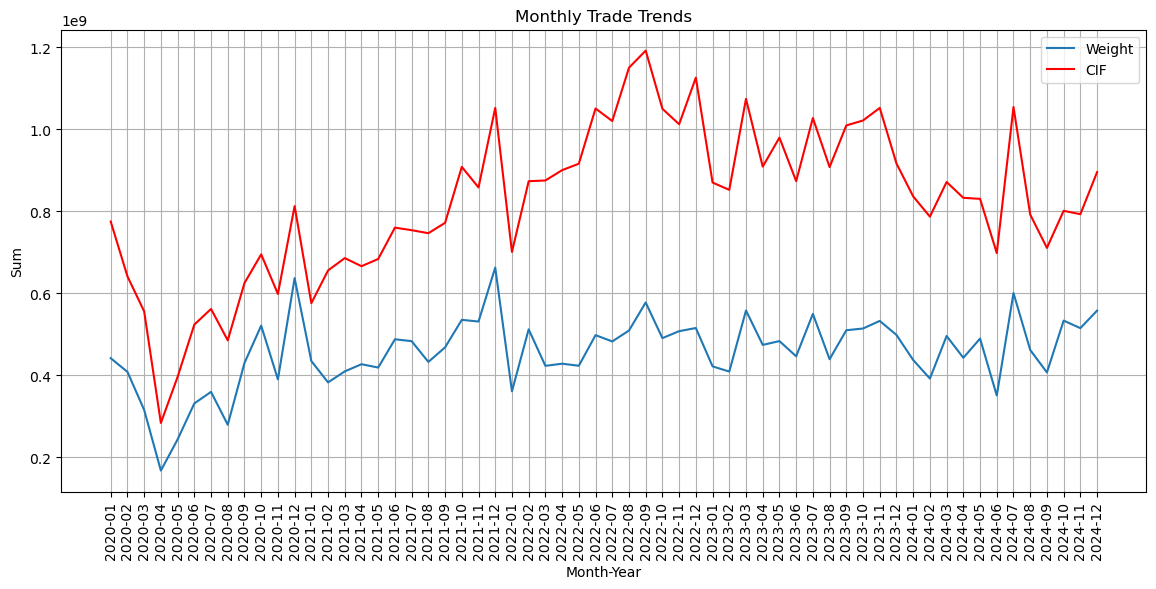

In [35]:
# Let's analyze on a timeline whether there are changes in the quantities, both in weight and FOB value.
# And if it's possible to find any patterns over these five years.
df['month_year'] = df['fecha'].dt.to_period('M')
monthly_trade = df.groupby('month_year').agg({'kilos': 'sum', 'fro': 'sum'}).reset_index()
monthly_trade['month_year'] = monthly_trade['month_year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trade, x='month_year', y='kilos', label='Weight')
sns.lineplot(data=monthly_trade, x='month_year', y='fro', label='CIF', color='red')
plt.title('Monthly Trade Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

I would like to see if there are countries that specialize in some fields, or at leats that bolivia focus on importing 

In [6]:
# Total FOB per country-import_field combo
country_field_df = df.groupby(['despai', 'ciiur3'])['fob'].sum().reset_index()

# Optional: normalize per country to get share
country_total = country_field_df.groupby('despai')['fob'].sum().reset_index(name='total_fob')
merged_df = country_field_df.merge(country_total, on='despai')
merged_df['fob_share'] = merged_df['fob'] / merged_df['total_fob']

In [7]:
top_fields = merged_df.sort_values(['despai', 'fob_share'], ascending=[True, False])
top_fields = top_fields.groupby('despai').head(3)

In [8]:
top_fields

,despai,ciiur3,fob,total_fob,fob_share
121,AFGANISTAN,3410,36710.0,111122.0,0.330358
100,AFGANISTAN,2924,24537.0,111122.0,0.220811
69,AFGANISTAN,2423,14175.0,111122.0,0.127562
249,ALAND ISLAS,2929,1527.0,3266.0,0.467544
220,ALAND ISLAS,2520,713.0,3266.0,0.218310
...,...,...,...,...,...
34755,ZIMBABWE,2924,570.0,2404.0,0.237105
34713,ZIMBABWE,2219,250.0,2404.0,0.103993
34869,ZONA FRANCA DE BOLIVIA,2423,1160977.0,1193333.0,0.972886
34934,ZONA FRANCA DE BOLIVIA,3693,5317.0,1193333.0,0.004456


In [9]:
# lets apply a filter and say that to be considered a top field it takes more than 50% of the total fob,
# therefore its fob_share is bigger than 0.5. and lets see the countris with the highest total_fob values

top_fields[top_fields['fob_share']>0.5].sort_values(by='total_fob', ascending=False).reset_index(drop=True).head(15)

,despai,ciiur3,fob,total_fob,fob_share
0,CHILE,2320,2.463703e+09,3.216677e+09,0.765916
1,SUIZA,2320,5.319922e+08,6.271700e+08,0.848242
2,BELGICA,2320,4.324309e+08,5.617658e+08,0.769771
3,PAISES BAJOS,2320,3.164030e+08,4.227711e+08,0.748402
4,SINGAPUR,2320,3.699924e+08,4.008401e+08,0.923042
5,TAILANDIA,3410,1.705323e+08,3.291223e+08,0.518143
6,INDONESIA,3410,1.492093e+08,2.523396e+08,0.591304
7,HUNGRIA,3410,8.149510e+07,1.058016e+08,0.770263
8,PANAMA,2320,7.617335e+07,9.717285e+07,0.783895
9,ARABIA SAUDITA,2320,3.404781e+07,5.622079e+07,0.605609


In [10]:
# Now lets do the same with weight instead of values to confirm its proportional 

country_w_field_df = df.groupby(['despai', 'ciiur3'])['kilos'].sum().reset_index()

country_total_w = country_w_field_df.groupby('despai')['kilos'].sum().reset_index(name='total_weight')
merged_w_df = country_w_field_df.merge(country_total_w, on='despai')
merged_w_df['weight_share'] = merged_w_df['kilos']/merged_w_df['total_weight']

In [11]:
merged_w_df[merged_w_df['weight_share']>0.5].sort_values(by='total_weight', ascending=False).reset_index(drop=True).head(15)

,despai,ciiur3,kilos,total_weight,weight_share
0,CHILE,2320,2.542124e+09,3.075709e+09,0.826516
1,ESTADOS UNIDOS,2320,1.261424e+09,1.761270e+09,0.716201
2,PARAGUAY,2320,2.679830e+08,4.967351e+08,0.539489
3,SUIZA,2320,4.667001e+08,4.720218e+08,0.988726
4,BELGICA,2320,3.784864e+08,4.164717e+08,0.908793
5,SINGAPUR,2320,3.577989e+08,3.662738e+08,0.976862
6,PAISES BAJOS,2320,2.980119e+08,3.300216e+08,0.903007
7,TURQUIA,2710,1.178782e+08,2.072163e+08,0.568866
8,URUGUAY,1553,1.038918e+08,1.892850e+08,0.548864
9,PANAMA,2320,1.285396e+08,1.354063e+08,0.949289


In [12]:
# as we can see chile takes first place with '2320' category, that refers to refined petroleum products
# lets make a chart looking at the nandina column to see the products under this category.

chile_petroleum = df[(df['despai']== 'CHILE') & (df['ciiur3']=='2320')]

In [13]:
# Group by 'nandina' and sum FOB and weight values
petroleum_products = chile_petroleum.groupby('nandina').agg(
    total_p_fob=('fob', 'sum'),
    total_p_weight=('kilos', 'sum')
).reset_index()

# Sort by FOB to highlight top categories
petroleum_products = petroleum_products.sort_values('total_p_fob', ascending=False)
petroleum_products

,nandina,total_p_fob,total_p_weight
3,2710192100,2.224193e+09,2.315859e+09
0,2710121310,2.150504e+08,2.040315e+08
1,2710121330,1.279383e+07,1.443806e+07
2,2710121340,5.297277e+06,4.941660e+06
9,2710193800,4.307783e+06,1.921013e+06
12,2710193890,8.325790e+05,3.246940e+05
13,2710193900,2.933670e+05,1.016970e+05
11,2710193820,2.865640e+05,1.264500e+05
5,2710193400,1.988740e+05,3.553500e+04
4,2710192200,1.922830e+05,2.625190e+05


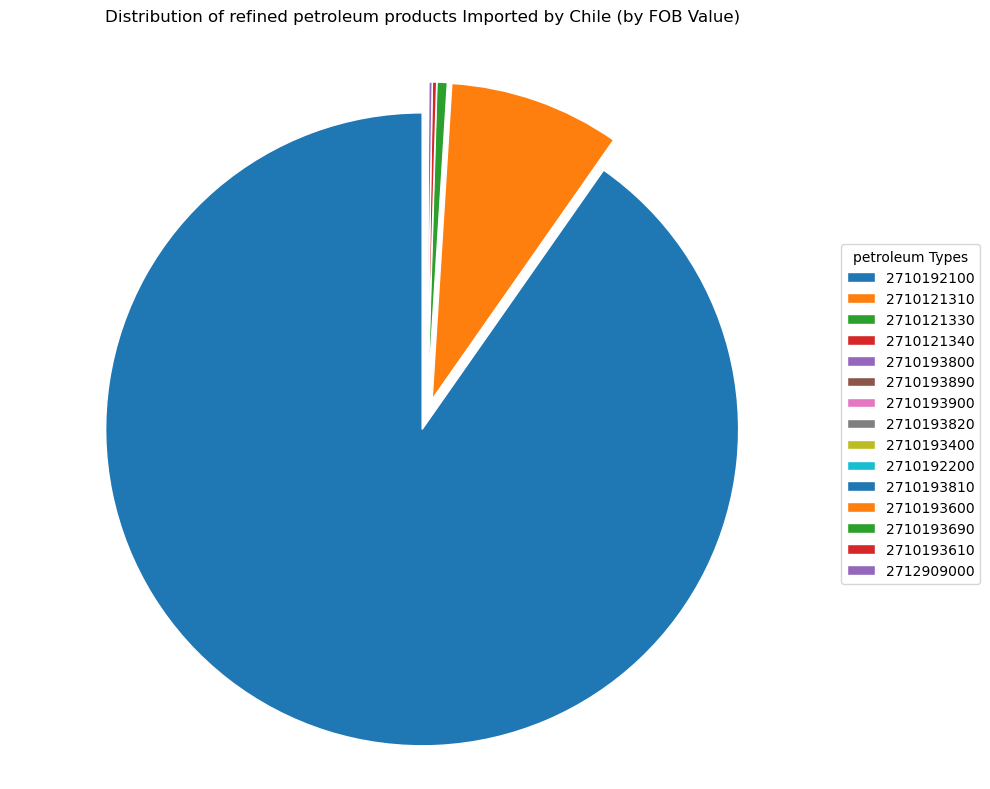

In [15]:
# Number of top categories to show percentages for
top_n = 2

# Sort values to find which indices correspond to the top N categories
sorted_indices = petroleum_products['total_p_fob'].argsort()[::-1]
top_indices = sorted_indices[:top_n]

# Function to conditionally show percentages
def autopct_func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    index = autopct_func.index
    autopct_func.index += 1
    if autopct_func.index - 1 in top_indices:
        return f"{pct:.1f}%"
    else:
        return ''
autopct_func.index = 0  # initialize counter

# colors = plt.cm.Pastel1.colors  
explode = [0.05] * len(petroleum_products)  # Slightly "explode" all slices

# Plot
plt.figure(figsize=(10, 8))
plt.pie(
    petroleum_products['total_p_fob'],
    # labels=petroleum_products['nandina'], since we have such a large category, labels look bad
    # autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate for better readability
    #  colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white'},  # Add white borders to slices
    textprops={'fontsize': 10}
)

plt.title('Distribution of refined petroleum products Imported by Chile (by FOB Value)', pad=20)
plt.axis('equal')  # Ensures pie is drawn as a circle

# Add legend (optional)
plt.legend(
    petroleum_products['nandina'],
    title="petroleum Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

In [16]:
# Lets explore if the rest of the countries have the same behavior
petrol_countries =  ['CHILE','SUIZA','BELGICA', 'PAISES BAJOS','SINGAPUR', 'PANAMA', 'ARABIA SAUDITA', 'LITUANIA', 'LETONIA' ]
nandina_to_product = {'2710192100': 'Diesel'}

In [20]:
# I would like to see the same chart with weight values on the agg function
petrol_countries_weight = ['CHILE', 'ESTADOS UNIDOS', 'PARAGUAY', 'SUIZA', 'BELGICA', 'SINGAPUR', 'PAISES BAJOS', 'PANAMA', 'ARABIA SAUDITA']

In [30]:
# when we take into account aggregated (sum) for the fob value we can see that for the top 9 countries, 
# diesel is not always the top product.

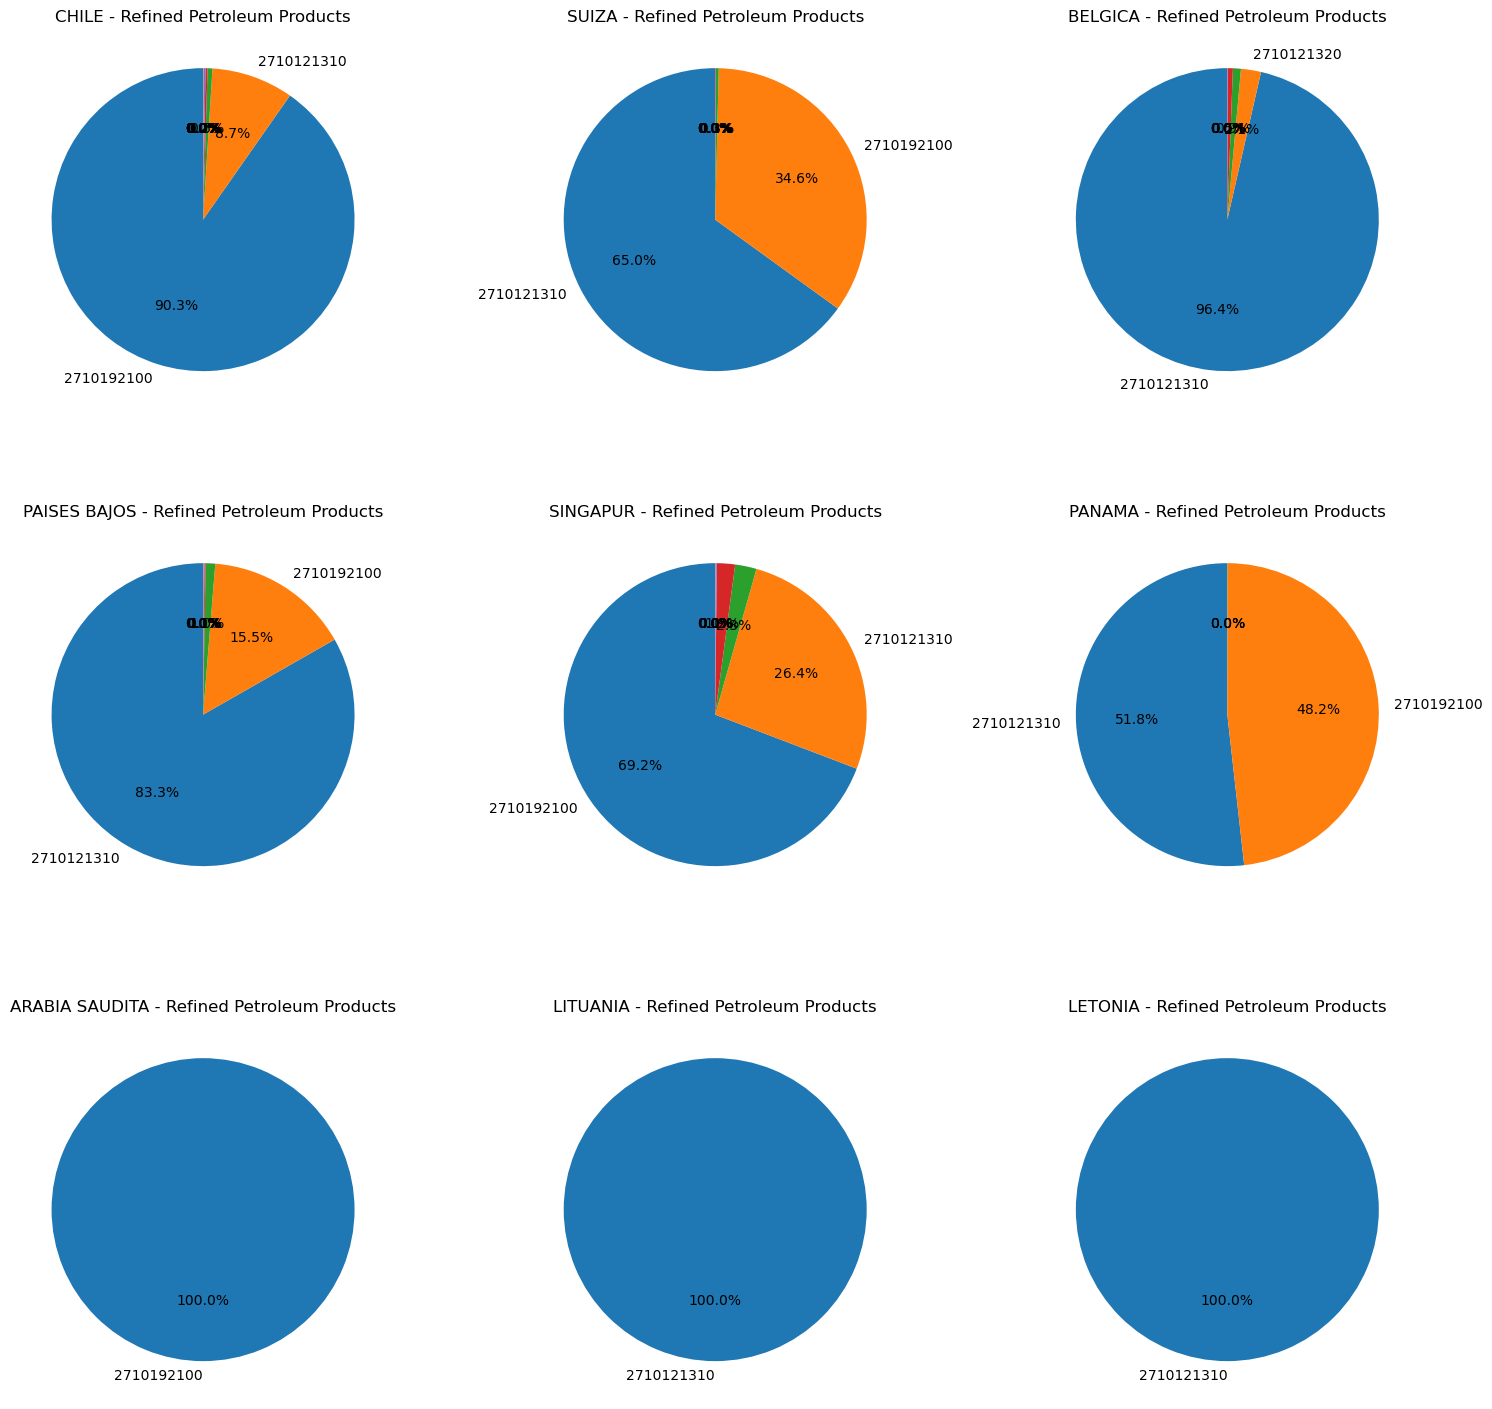

In [18]:
# Set up a subplot grid (3x3 for 9 countries)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easy iteration

for idx, country in enumerate(petrol_countries):
    # Filter for country and refined petroleum category ('2320')
    country_petroleum = df[(df['despai'] == country) & (df['ciiur3'] == '2320')]
    
    # Group by 'nandina' and sum FOB values
    petroleum_products = country_petroleum.groupby('nandina').agg(
        total_p_fob=('fob', 'sum')
    ).reset_index()
    
    # Sort by FOB to highlight top products
    petroleum_products = petroleum_products.sort_values('total_p_fob', ascending=False)
    
    # Prepare data for pie chart
    labels = petroleum_products['nandina'].astype(str).tolist()
    sizes = petroleum_products['total_p_fob'].tolist()
    
    # Create a list for autopct: only show for top 2, others get empty strings
    def custom_autopct(pct):
        total = sum(sizes)
        val = pct * total / 100
        if val > 0 and labels.index(petroleum_products['nandina'][petroleum_products['total_p_fob'].idxmax()]) < 2:
            return f'{pct:.1f}%'
        return ''

    # Plot pie chart
    axes[idx].pie(sizes, labels=[label if i < 2 else '' for i, label in enumerate(labels)], 
                  autopct=custom_autopct, startangle=90)
    axes[idx].set_title(f'{country} - Refined Petroleum Products')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

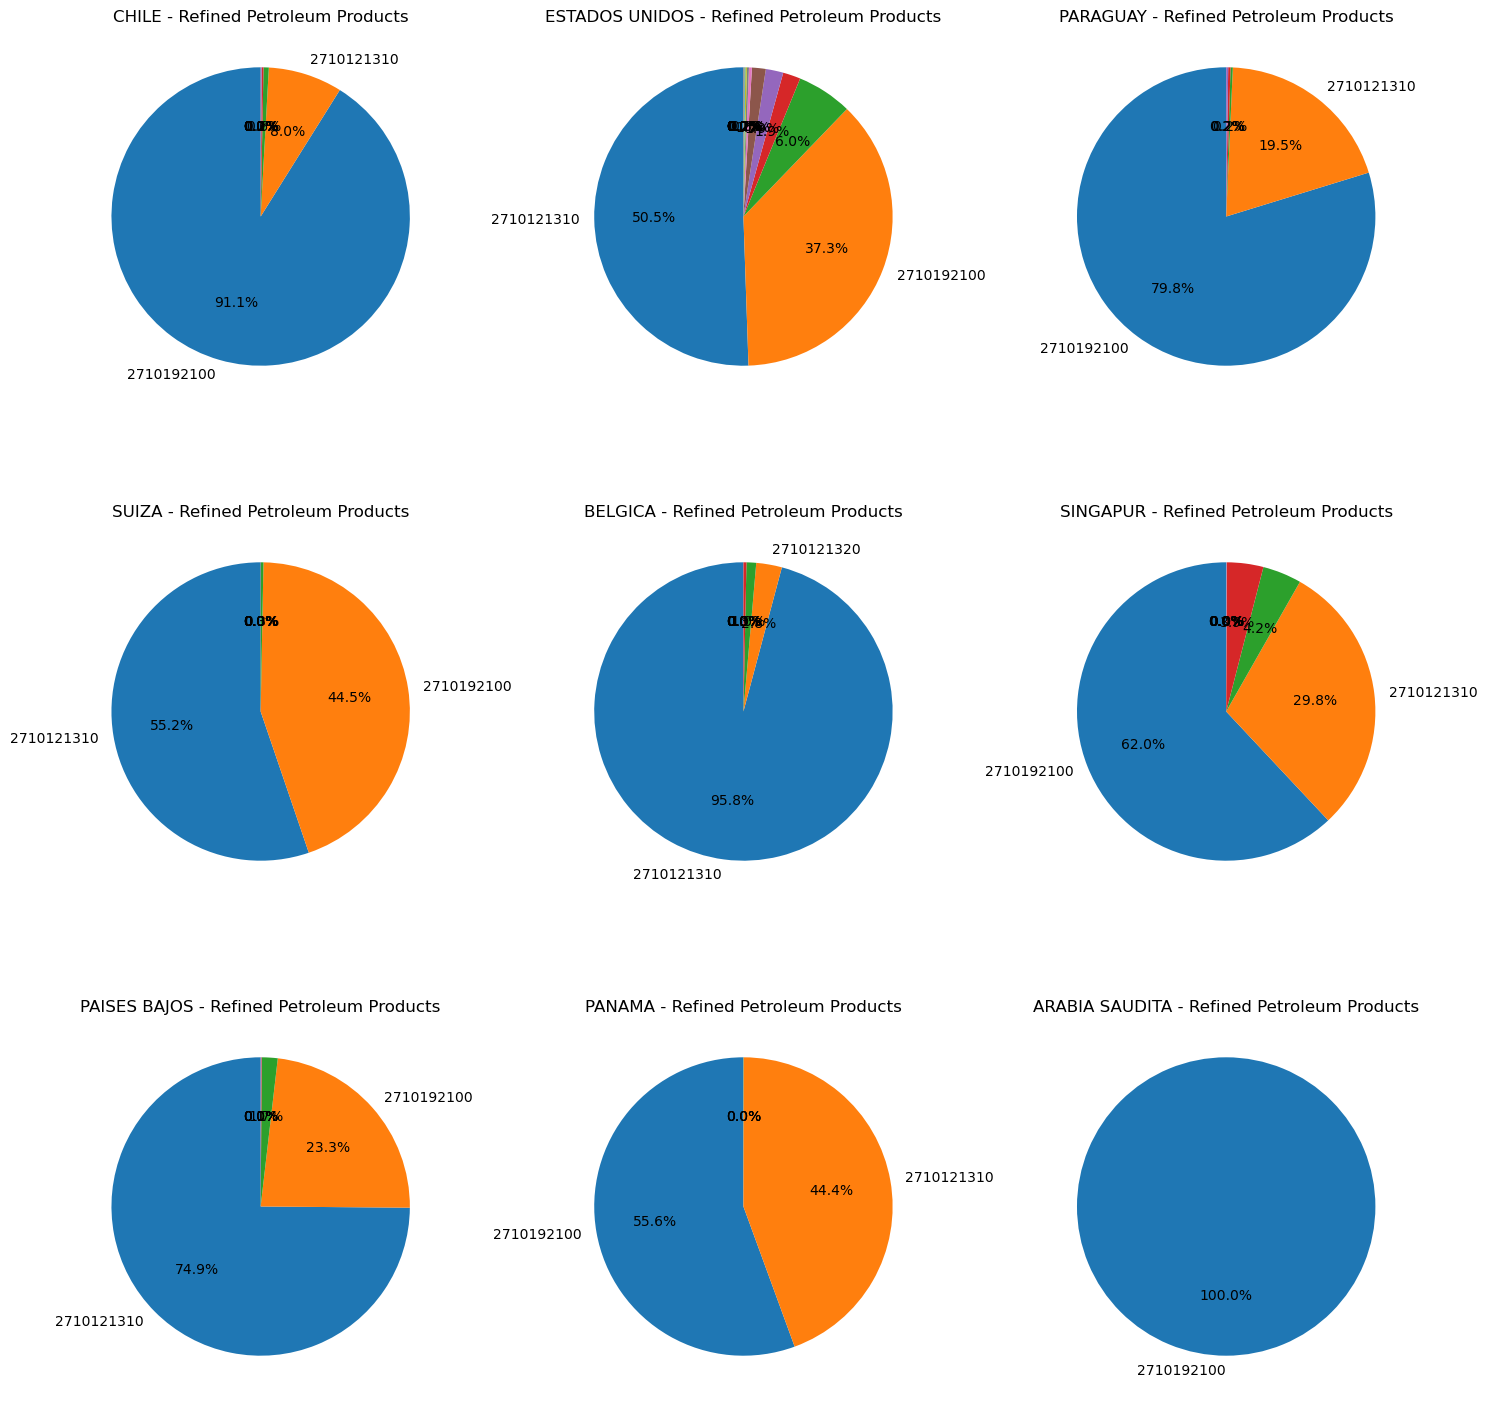

In [23]:
# Set up a subplot grid (3x3 for 9 countries)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easy iteration

for idx, country in enumerate(petrol_countries_weight):
    # Filter for country and refined petroleum category ('2320')
    country_petroleum = df[(df['despai'] == country) & (df['ciiur3'] == '2320')]
    
    # Group by 'nandina' and sum FOB values
    petroleum_products = country_petroleum.groupby('nandina').agg(
        total_p_weight=('kilos', 'sum')
    ).reset_index()
    
    # Sort by FOB to highlight top products
    petroleum_products = petroleum_products.sort_values('total_p_weight', ascending=False)
    
    # Prepare data for pie chart
    labels = petroleum_products['nandina'].astype(str).tolist()
    sizes = petroleum_products['total_p_weight'].tolist()
    
    # Create a list for autopct: only show for top 2, others get empty strings
    def custom_autopct(pct):
        total = sum(sizes)
        val = pct * total / 100
        if val > 0 and labels.index(petroleum_products['nandina'][petroleum_products['total_p_weight'].idxmax()]) < 2:
            return f'{pct:.1f}%'
        return ''

    # Plot pie chart
    axes[idx].pie(sizes, labels=[label if i < 2 else '' for i, label in enumerate(labels)], 
                  autopct=custom_autopct, startangle=90)
    axes[idx].set_title(f'{country} - Refined Petroleum Products')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
# we have stablished that the vast mayority of Petroleum-derived products enter the country through
# Chilean border crossings. Let's visualize this trend and dig a little bit further.

# Our column "desvia", shows the entry points to the country each individual import takes place.
df['desvia'].unique().tolist()

['AEREA',
 'DESAGUADERO',
 'IQUIQUE - PISIGA - BELLA VISTA',
 'ARICA - CHARANA - TAMBO QUEMAD',
 'CORUMBA - PUERTO SUAREZ',
 'POCITOS (ARG.) - YACUIBA',
 'LA QUIACA - VILLAZON',
 'ANTOFAGASTA - OLLAGUE - UYUNI',
 'AMAZONAS - COBIJA -GUAYARAMERI',
 'POSTAL - CORREO',
 'DESCONOCIDA',
 'ORAN - BERMEJO',
 'ZONAS FRANCAS']

In [8]:
# This are the main entry points, notice here we have data such as "AREA", "Postal - Correo" and "DESCONOCIDA"
# "AEREA" refers to imports that arrive on Airports, "Postal - Correo" and "DESCONOCIDA" are vague 
# so we won't take them in consideration

via_aerea = df[df['desvia']== "AEREA"]
via_aerea['desadu'].unique().tolist()

['Aeropuerto Viru-Viru',
 'Aeropuerto El Alto',
 'Aeropuerto Cochabamba',
 'Interior La Paz',
 'Interior Santa Cruz',
 'Interior Cochabamba',
 'No Especificado',
 'Frontera Yacuiba',
 'Zona Franca Industrial El Alto',
 'Interior Oruro',
 'Interior Potos¡',
 'Interior Sucre',
 'Interior Tarija',
 'Fluvial Puerto Jennefer']

In [11]:
via_aerea.desadu.value_counts()

desadu
Aeropuerto Viru-Viru              441143
Aeropuerto El Alto                268923
Aeropuerto Cochabamba              61474
Interior Sucre                       813
Interior Santa Cruz                  322
No Especificado                      238
Zona Franca Industrial El Alto        60
Interior Cochabamba                   58
Interior La Paz                       52
Interior Potos¡                       48
Fluvial Puerto Jennefer               39
Frontera Yacuiba                      16
Interior Tarija                        9
Interior Oruro                         2
Name: count, dtype: int64

In [10]:

# When we filter to see which airports are being used we can identify the three main ones are located 
# in: La Paz, Cochabamba and Santa Cruz. The rest provide, once again, vague information a make up to 
# just fraction of imports that come by air so we will ignore them


In [13]:
# Now let's create two new columns, we will use them to identify geographically this entry points
# I have identified, for each entry point, both latitude and longitude in this dictionary

customs_data = {
    "AEREA": {},
    "DESAGUADERO": {'latitude': -16.566667, 'longitude': -69.0},
    "IQUIQUE - PISIGA - BELLA VISTA": {'latitude': -19.266667, 'longitude': -68.616667},
    "ARICA - CHARANA - TAMBO QUEMAD": {'latitude': -17.591944, 'longitude': -69.445556},
    "CORUMBA - PUERTO SUAREZ": {'latitude': -18.9661645, 'longitude': -57.8032514},
    "POCITOS (ARG.) - YACUIBA": {'latitude': -22.009722, 'longitude': -63.677222},
    "LA QUIACA - VILLAZON": {'latitude': -22.09650, 'longitude': -65.59629},
    "ANTOFAGASTA - OLLAGUE - UYUNI": {'latitude': -21.283333, 'longitude': -68.183333},
    "AMAZONAS - COBIJA -GUAYARAMERI": {'latitude': -11.01, 'longitude': -68.766667},
    "POSTAL - CORREO": {},
    "DESCONOCIDA": {},
    "ORAN - BERMEJO": {'latitude': -22.732222, 'longitude': -64.3425},
    "ZONAS FRANCAS": {}
}

airport_data = {
    "Aeropuerto Viru-Viru": {'latitude': -17.6447, 'longitude': -63.1353},
    "Aeropuerto El Alto": {'latitude': -16.5110911, 'longitude': -68.1878565},
    "Aeropuerto Cochabamba": {'latitude': -17.42081, 'longitude': -66.17746}
}

In [14]:
# now we assign this values for each import, we'll first look for the customs_data dictionary, once that
# is done we'll filter for the main airports for the values under "AEREA"

# First: latitude and longitude from customs_data using 'desvia'
df['Lattitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('latitude', ''))
df['Longitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('longitude', ''))

# Then: if any are still empty, fill them with values from airport_data using 'desadu'
df['Lattitude'] = df.apply(
    lambda row: airport_data.get(row['desadu'], {}).get('latitude', '') if row['Lattitude'] == '' else row['Lattitude'],
    axis=1
)
df['Longitude'] = df.apply(
    lambda row: airport_data.get(row['desadu'], {}).get('longitude', '') if row['Longitude'] == '' else row['Longitude'],
    axis=1
)

In [16]:
# Now let's check if it was done correctly
df.head(10)

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,Lattitude,Longitude
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01,-17.6447,-63.1353
1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,2020-09-01,-16.566667,-69.0
2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,2020-11-01,-16.566667,-69.0
3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501.0,346.0,300.0,2408.0,120.0,2922,7373,2020-01-01,-19.266667,-68.616667
4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,2020-02-01,-17.591944,-69.445556
5,2020,5,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,TAILANDIA,4016999000,LAS DEMAS MANUFACTURAS DE CAUCHO VULCANIZADO S...,630,220,9.0,629.0,582.0,4376.0,437.0,2519,6299,2020-05-01,-17.591944,-69.445556
6,2020,5,Interior Santa Cruz,7,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,TURQUIA,8421310000,APARATOS PARA FILTRAR O DEPURAR GASES: FILTROS...,410,840,1.0,27.0,25.0,185.0,9.0,2919,7436,2020-05-01,-19.266667,-68.616667
7,2020,10,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,MEXICO,8471410000,LAS DEMAS MAQUINAS AUTOMATICAS PARA TRATAMIENT...,410,810,818.0,6423.0,5882.0,44702.0,4470.0,3000,7522,2020-10-01,-17.591944,-69.445556
8,2020,1,Interior Cochabamba,3,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,8409993000,"LAS DEMAS PARTES,IDENTIFICABLES COMO DESTINADA...",530,910,5.0,23.0,19.0,160.0,8.0,3430,7139,2020-01-01,-17.591944,-69.445556
9,2020,7,Interior Santa Cruz,7,CORUMBA - PUERTO SUAREZ,CARRETERA,BRASIL,8419110000,CALENTADORES DE AGUA DE CALENTAMIENTO INSTANTA...,410,840,43.0,481.0,300.0,3348.0,0.0,2930,7418,2020-07-01,-18.966165,-57.803251


In [17]:
# Let's save this table, so we can work with it.

df.to_csv('C:/Users/sebas/Documents/Bolivia_imports/maps.csv')

In [19]:
df = pd.read_csv('maps.csv')

In [20]:
# we will use geopandas to get a graph that shows he entry points to the country 
# and their magnitudes, according to their FOB value and weight
import geopandas as gpd 

C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


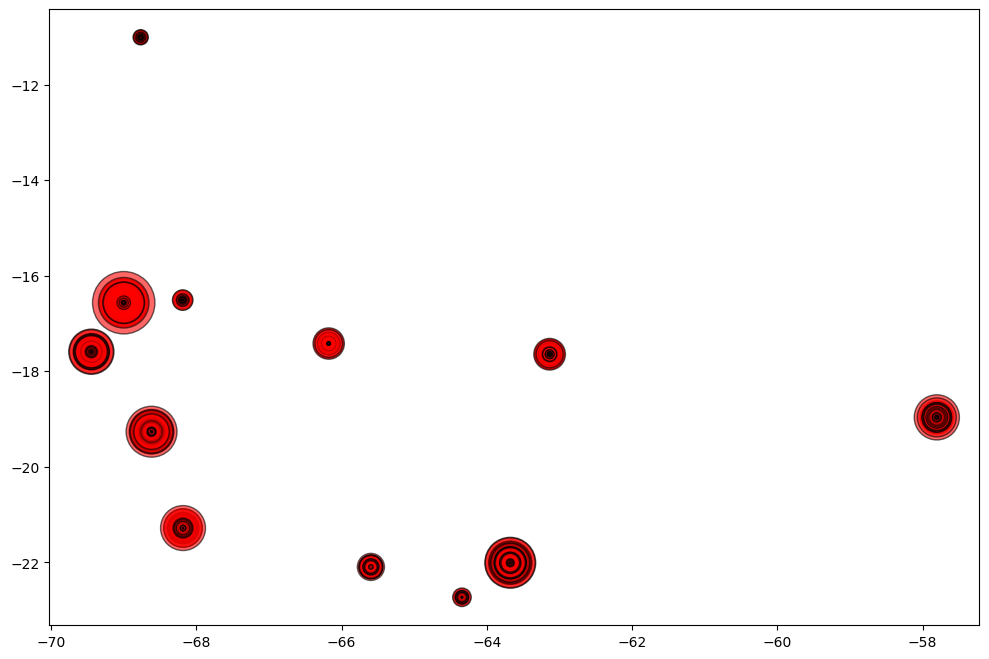

In [22]:
# frist let's make a simple sketch with just matplotlib

plt.figure(figsize=(12, 8))
# Plot bubbles (size scaled by FOB value)
plt.scatter(
    df["Longitude"],
    df["Lattitude"],
    s=df["fob"] / 50000,  # Adjust scale 
    c="red",              
    alpha=0.6,            
    edgecolors="black",   
    label="FOB Value (USD)"
)
plt.show()

C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


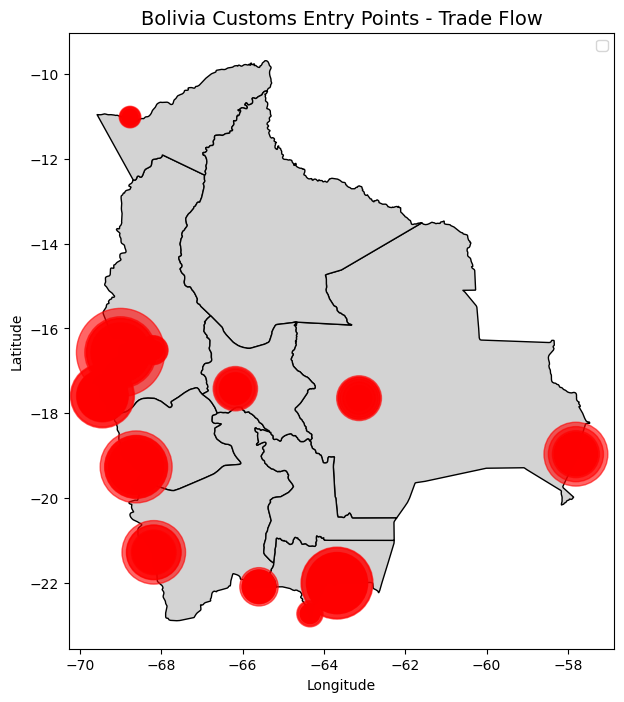

In [25]:
# This is a rough sketch But we can identify that these points correspond to the points
# established in the country(with some previous knowledge about shape and locations)
# Now lets give it a try with geopandas

#file containing Bolivia's map 
bolivia_map = gpd.read_file(r"C:\Users\sebas\Documents\Bolivia_imports\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    df["Longitude"],
    df["Lattitude"],
    s=df["fob"] / 25000,
    c="red",
    alpha=0.6,
   # label="FOB Value (USD)" # won't be using a label at the moment. provocos a bug with the graph
)

plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


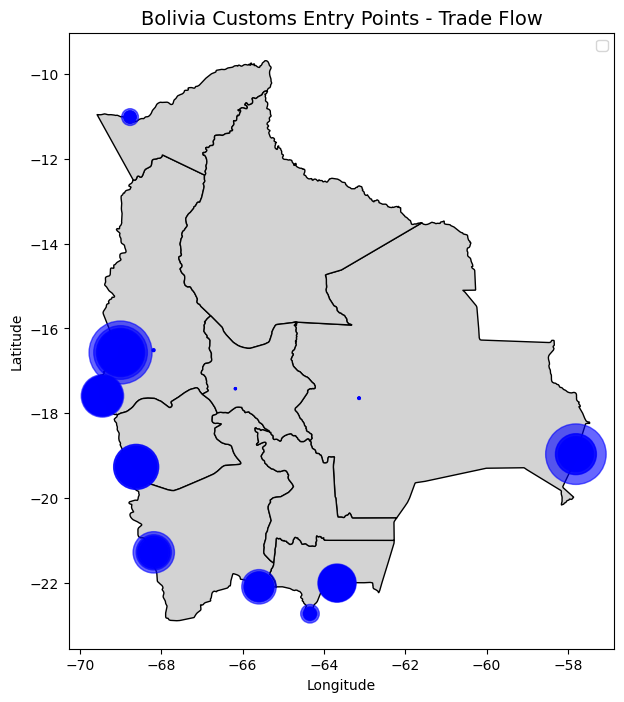

In [26]:
# Now let's do the same thing for weight, and see if it changes just like we saw with the heat map
#file containing Bolivia's map 
bolivia_map = gpd.read_file(r"C:\Users\sebas\Documents\Bolivia_imports\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    df["Longitude"],
    df["Lattitude"],
    s=df["kilos"] / 50000,
    c="blue",
    alpha=0.6,
   # label="weight Value (kilos)"
)

plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [32]:
# Both of this maps show all the flow and magnitudes of total imports. 
# Like we said before, diesel has been a hot topic lately. lets apply some filters

mask = (
    df['desnan'].notna() &
    df['desnan'].str.contains("DIESEL") &
    (df['ciiur3'] == '2320') # To filter out data that would refer to vehicles or machinery that uses DIESEL
)
df_filtered = df[mask]

df_filtered.head()

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,Lattitude,Longitude
1927,1927,2020,3,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,2.710192e+09,GASOILS (GASOLEO) (DIESEL),322,313,6699338.0,5734404.0,5497509.0,39911451.0,0.0,2320,3343,2020-03-01,-22.009722,-63.677222
2697,2697,2020,2,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,SUIZA,2.710192e+09,GASOILS (GASOLEO) (DIESEL),322,313,3652910.0,2908655.0,2412419.0,20244236.0,0.0,2320,3343,2020-02-01,-22.009722,-63.677222
4233,4233,2020,1,Frontera Bermejo,6,ORAN - BERMEJO,CARRETERA,ESTADOS UNIDOS,2.710192e+09,GASOILS (GASOLEO) (DIESEL),322,313,138456.0,111853.0,89324.0,778500.0,0.0,2320,3343,2020-01-01,-22.732222,-64.342500
5985,5985,2020,8,Frontera Tambo Quemado,4,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,OMAN,2.710192e+09,GASOILS (GASOLEO) (DIESEL),322,313,14653483.0,7865018.0,6656816.0,54740528.0,0.0,2320,3343,2020-08-01,-17.591944,-69.445556
10174,10174,2020,7,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,OMAN,2.710192e+09,GASOILS (GASOLEO) (DIESEL),322,313,2801221.0,2039629.0,1652429.0,14195821.0,0.0,2320,3343,2020-07-01,-22.009722,-63.677222


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


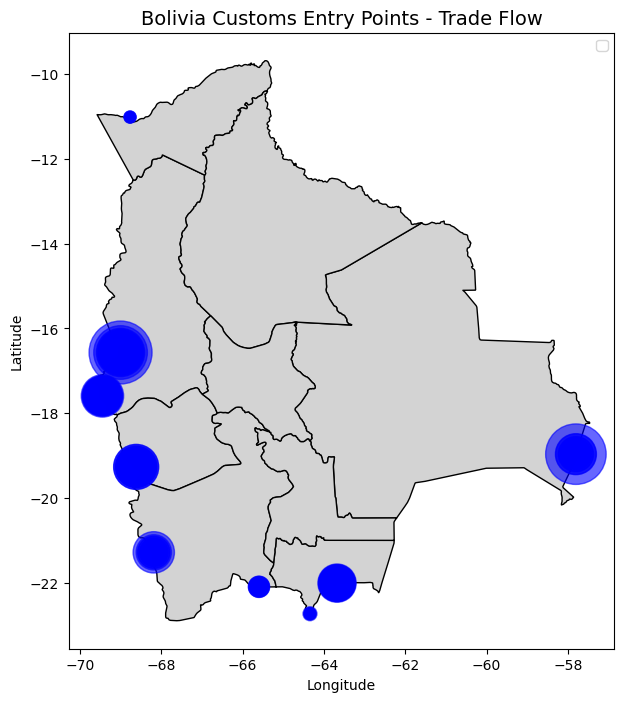

In [34]:
#file containing Bolivia's map 
bolivia_map = gpd.read_file(r"C:\Users\sebas\Documents\Bolivia_imports\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    df_filtered["Longitude"],
    df_filtered["Lattitude"],
    s=df_filtered["kilos"] / 50000,
    c="blue",
    alpha=0.6,
   # label="weight Value (kilos)"
)

plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


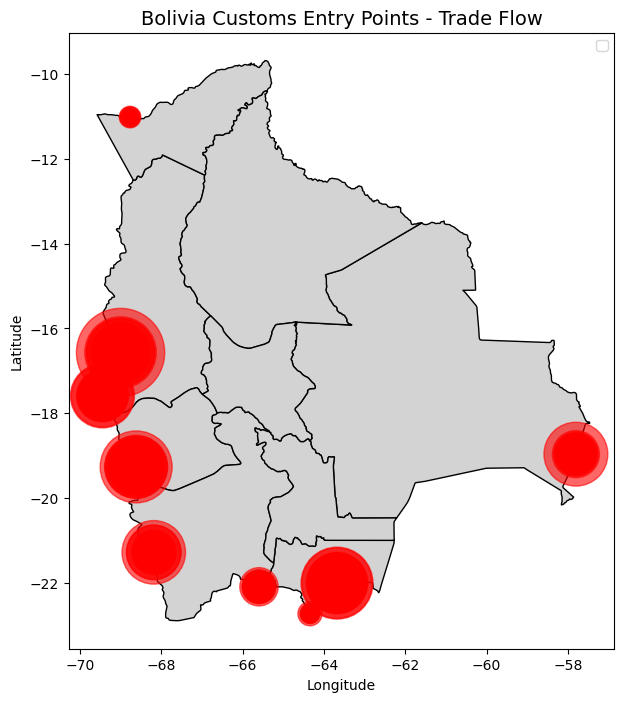

In [35]:
#file containing Bolivia's map 
bolivia_map = gpd.read_file(r"C:\Users\sebas\Documents\Bolivia_imports\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    df_filtered["Longitude"],
    df_filtered["Lattitude"],
    s=df_filtered["fob"] / 25000,
    c="red",
    alpha=0.6,
   # label="weight Value (kilos)"
)

plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [38]:
# trend remained the same, so now i would like to see, all this DIESEL
df_filtered['despai'].unique().tolist()


['ARGENTINA',
 'SUIZA',
 'ESTADOS UNIDOS',
 'OMAN',
 'RUSIA, FEDERACION DE',
 'CHILE',
 'PERU',
 'INDIA',
 'PAISES BAJOS',
 'PANAMA',
 'SINGAPUR',
 'BRASIL',
 'VIRGENES, ISLAS (ESTADOS UNIDOS)',
 'BAHREIN',
 'PORTUGAL',
 'SUECIA',
 'ARGELIA',
 'PARAGUAY',
 'ARABIA SAUDITA',
 'TAIWAN',
 'JAPON',
 'MEXICO',
 'COREA (SUR), REPUBLICA DE',
 'ESPAÐA',
 'ITALIA',
 'EMIRATOS ARABES UNIDOS',
 'ECUADOR',
 'CHINA',
 'REINO UNIDO',
 'URUGUAY',
 'TURQUIA',
 'CANADA']